In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

import PIL

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

from keras.datasets import cifar10

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


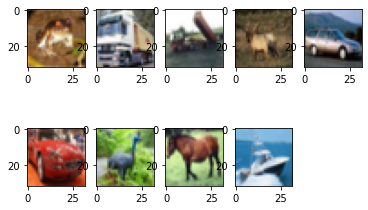

In [4]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	plt.subplot(250 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

## this was taken from url below to help find code on how to print images
## https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/

In [7]:
num_classes=10
img_height=32
img_width=32

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)         

In [9]:
epoch = 15
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epoch, batch_size=64)

Epoch 1/15
782/782 [==============================] - 7s 8ms/step - loss: 0.8168 - accuracy: 0.7140 - val_loss: 0.8995 - val_accuracy: 0.6902
Epoch 2/15
782/782 [==============================] - 7s 8ms/step - loss: 0.7653 - accuracy: 0.7322 - val_loss: 0.8502 - val_accuracy: 0.7006
Epoch 3/15
782/782 [==============================] - 7s 8ms/step - loss: 0.7170 - accuracy: 0.7484 - val_loss: 0.8421 - val_accuracy: 0.7114
Epoch 4/15
782/782 [==============================] - 7s 8ms/step - loss: 0.6761 - accuracy: 0.7630 - val_loss: 0.8339 - val_accuracy: 0.7127
Epoch 5/15
782/782 [==============================] - 7s 8ms/step - loss: 0.6343 - accuracy: 0.7765 - val_loss: 0.8191 - val_accuracy: 0.7192
Epoch 6/15
782/782 [==============================] - 7s 8ms/step - loss: 0.6009 - accuracy: 0.7887 - val_loss: 0.8651 - val_accuracy: 0.7138
Epoch 7/15
782/782 [==============================] - 7s 8ms/step - loss: 0.5668 - accuracy: 0.8004 - val_loss: 0.8741 - val_accuracy: 0.7178
Epoch 

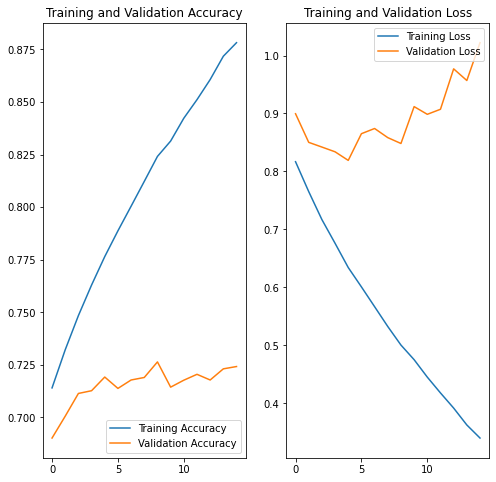

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epoch)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 10
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)


Epoch 1/10
782/782 [==============================] - 10s 11ms/step - loss: 1.6399 - accuracy: 0.4009 - val_loss: 1.3678 - val_accuracy: 0.5054
Epoch 2/10
782/782 [==============================] - 9s 11ms/step - loss: 1.3645 - accuracy: 0.5113 - val_loss: 1.2292 - val_accuracy: 0.5658
Epoch 3/10
782/782 [==============================] - 9s 11ms/step - loss: 1.2539 - accuracy: 0.5544 - val_loss: 1.1934 - val_accuracy: 0.5802
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1857 - accuracy: 0.5789 - val_loss: 1.0026 - val_accuracy: 0.6473
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 1.1315 - accuracy: 0.5974 - val_loss: 1.0865 - val_accuracy: 0.6166
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 1.0866 - accuracy: 0.6163 - val_loss: 0.9422 - val_accuracy: 0.6668
Epoch 7/10
782/782 [==============================] - 9s 11ms/step - loss: 1.0503 - accuracy: 0.6277 - val_loss: 0.9713 - val_accuracy: 0.665

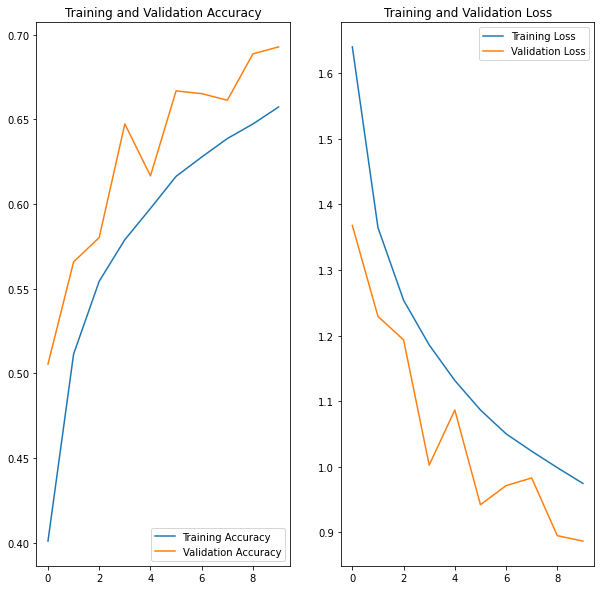

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [19]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
  img = load_image('/content/redcar.jpg')
  result = model.predict(img)
  score = tf.nn.softmax(result[0])
  print(score)
  print(np.argmax(score))
 
# entry point, run the example
run_example()

tf.Tensor(
[0.02259408 0.00147485 0.1517687  0.54919803 0.14653808 0.03042961
 0.05440659 0.0120791  0.02966742 0.00184348], shape=(10,), dtype=float32)
3


In [22]:

sunflower_path = "/content/redcar.jpg"

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)
print(score)

This image most likely belongs to automobile with a 87.43 percent confidence.
tf.Tensor(
[6.3248899e-06 8.7434077e-01 1.3979104e-10 6.5640677e-08 3.6418005e-08
 3.0157167e-08 7.2714275e-09 2.6575817e-08 2.5530909e-07 1.2565239e-01], shape=(10,), dtype=float32)


In [26]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.3),
    layers.experimental.preprocessing.RandomZoom(0.3),
  ]
)

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.4),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)

Epoch 1/15
782/782 [==============================] - 10s 11ms/step - loss: 1.8671 - accuracy: 0.3181 - val_loss: 1.7714 - val_accuracy: 0.3668
Epoch 2/15
782/782 [==============================] - 9s 11ms/step - loss: 1.6591 - accuracy: 0.3987 - val_loss: 1.5880 - val_accuracy: 0.4318
Epoch 3/15
782/782 [==============================] - 9s 11ms/step - loss: 1.5785 - accuracy: 0.4293 - val_loss: 1.4527 - val_accuracy: 0.4884
Epoch 4/15
782/782 [==============================] - 9s 11ms/step - loss: 1.5361 - accuracy: 0.4448 - val_loss: 1.4477 - val_accuracy: 0.4885
Epoch 5/15
782/782 [==============================] - 9s 11ms/step - loss: 1.4932 - accuracy: 0.4609 - val_loss: 1.3991 - val_accuracy: 0.4985
Epoch 6/15
782/782 [==============================] - 9s 11ms/step - loss: 1.4563 - accuracy: 0.4805 - val_loss: 1.3474 - val_accuracy: 0.5183
Epoch 7/15
782/782 [==============================] - 9s 11ms/step - loss: 1.4271 - accuracy: 0.4897 - val_loss: 1.3210 - val_accuracy: 0.524

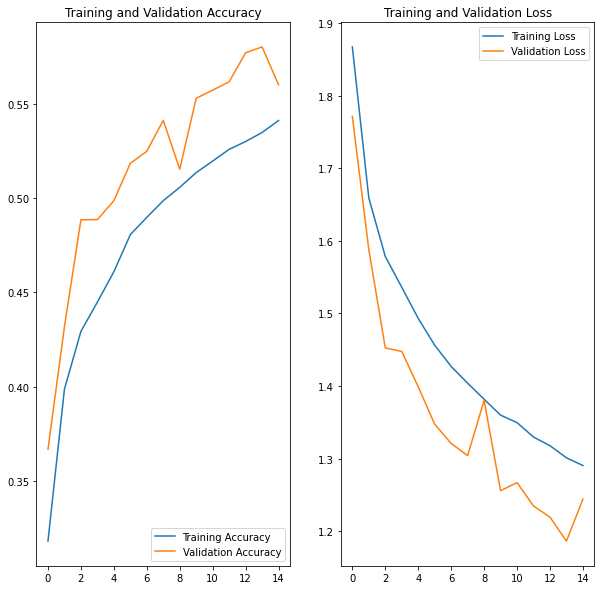

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [31]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model
 
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(32, 32))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 3 channels
	img = img.reshape(1, 32, 32, 3)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img
 
# load an image and predict the class
def run_example():
  img0 = load_image('/content/airplane.jpg')
  img1 = load_image('/content/boat.jpg')
  img2 = load_image('/content/moose.jpg')
  img3 = load_image('/content/redcar.jpg')
  img4 = load_image('/content/truck.jpg')

  result0 = model.predict(img0)
  result1 = model.predict(img1)
  result2 = model.predict(img2)
  result3 = model.predict(img3)
  result4 = model.predict(img4)

  score0 = tf.nn.softmax(result0[0])  
  print(score0)
  print(np.argmax(score0))

  score1 = tf.nn.softmax(result1[0])
  print(score1)
  print(np.argmax(score1))

  score2 = tf.nn.softmax(result2[0])
  print(score2)
  print(np.argmax(score2))

  score3 = tf.nn.softmax(result3[0])
  print(score3)
  print(np.argmax(score3))

  score4 = tf.nn.softmax(result4[0])
  print(score4)
  print(np.argmax(score4))
 
# entry point, run the example
run_example()

tf.Tensor(
[0.12624928 0.00217126 0.16223474 0.4469673  0.10037121 0.02688548
 0.07136562 0.02103861 0.04139122 0.00132525], shape=(10,), dtype=float32)
3
tf.Tensor(
[0.12379843 0.00222836 0.16089629 0.44932675 0.10071252 0.02725559
 0.07193796 0.02112816 0.0413641  0.00135187], shape=(10,), dtype=float32)
3
tf.Tensor(
[0.12284376 0.00219603 0.16238792 0.45245665 0.09859108 0.02725835
 0.07036061 0.02096109 0.04160807 0.00133642], shape=(10,), dtype=float32)
3
tf.Tensor(
[0.12490048 0.00232914 0.16230915 0.44331816 0.10214888 0.02782162
 0.07194918 0.02169977 0.04211049 0.00141312], shape=(10,), dtype=float32)
3
tf.Tensor(
[0.12406266 0.00221331 0.161278   0.44900423 0.10083152 0.02728673
 0.07162344 0.02100104 0.04134575 0.0013533 ], shape=(10,), dtype=float32)
3


In [33]:
model.save("result.h5")